# **IMPORTED LIBRARES**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# **DATASET**

In [ ]:
df = pd.read_csv("brain_stroke.csv")
# read the dataset and create instance of the data

In [ ]:
df.head(5)
# display the dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.shape
# its shows how many rows and columns we have in the dataset

(4981, 11)

<Axes: >

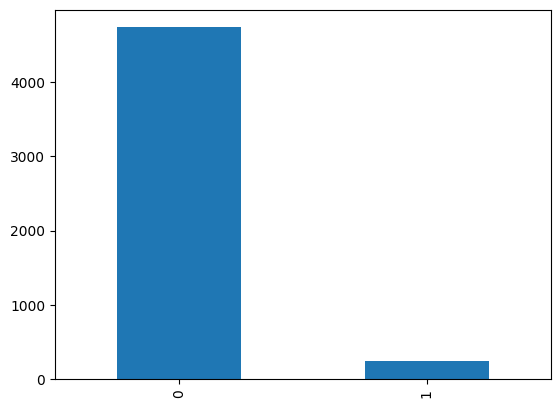

In [ ]:
df['stroke'].value_counts().plot(kind='bar')
# The percentage of targeted attribute in the dataset as bar chart

In [ ]:
df.isna().sum()
# Check null values in the dataset

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# **ENCODER**

In [ ]:
new_data=df.copy()
# new instance of the data to modifying it

In [ ]:
encoded_columns = ['gender','ever_married','work_type','Residence_type','smoking_status']
# Text columns to be modified

for column in  encoded_columns:
# iterate over text column we choose

  le = LabelEncoder()
# perform label encoder on text columns

  new_data[column] = le.fit_transform(new_data[column])
  # transform the data in new_data

In [ ]:
new_data.head(5)
# show the data after modifying it

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [ ]:
fig = px.imshow(new_data.corr(), text_auto=True, aspect="auto")
fig.show()
# Heatmap for each attributes compared to all other attributes

# **Correlation**

correlation between stroke and all dataset attributes
to know which are most important attributes have big weight and effect on stroke.

In [ ]:
corr_matrix = new_data.corr()
corr_matrix["stroke"]

gender               0.008870
age                  0.246478
hypertension         0.131965
heart_disease        0.134610
ever_married         0.108398
work_type           -0.041835
Residence_type       0.016494
avg_glucose_level    0.133227
bmi                  0.056926
smoking_status       0.027463
stroke               1.000000
Name: stroke, dtype: float64

# **PIE CHARTS**

**PIE CHARTS**


charts shows the percentage of having stroke with other atteributes depends on health search and correlation as shown above.

Note: all attribute chossen in pie charts are binary values.

In [ ]:
fig = px.pie(df, values='hypertension',names='stroke',title='Percentage of Stroke according to Hypertension')
fig.show()

The chart shown above shows:

The percentage of having stroke when having hypertension, and its not that important.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
fig = px.pie(df, values='stroke',names='smoking_status',title='Percentage of Stroke according to Smoking status')
fig.show()

The chart shown above shows:

The percentage of having stroke compared to smoking status, which is one the main resons for having stroks.


*DONT SMOKE*

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
fig = px.pie(df, values='stroke',names='ever_married',title='Percentage of stroke according to Ever married')
fig.show()

The chart shown above shows:

The percentage of having stroke when you are married, it has high effect on having stroke and Psychiatric illness.

# **HISTOGRAM CHARTS**



**HISTOGRAMS CHARTS**

these charts shows the percntage of having stroke with other atteributes depends on health search and correlation as shown above


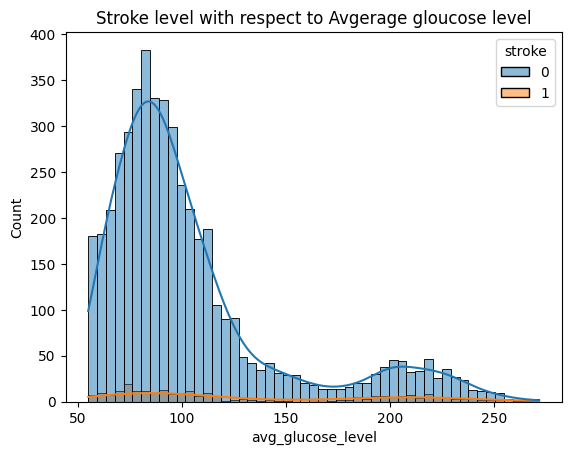

In [ ]:
sns.histplot(x='avg_glucose_level',hue='stroke',data=df,kde=True)
plt.title("Stroke level with respect to Avgerage gloucose level")
plt.show()

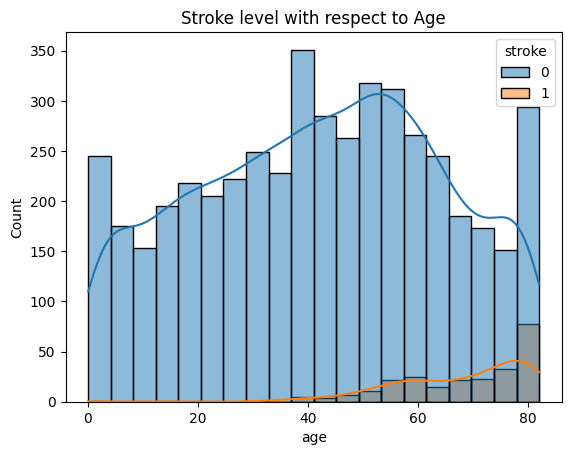

In [ ]:
sns.histplot(x='age',hue='stroke',data=df,kde=True)
plt.title("Stroke level with respect to Age")
plt.show()

# **TREE MODEL**

**ALL DATASET WITHOUT DROPPING ANY ATTRIBUTES**

We used decision tree model because it fits the best we real health dataset as WHO search reuslts says.
The model dont have high accracy but the high (true positive) results.


In [ ]:
data = pd.read_csv('brain_stroke.csv')
# Store the dataset in data variable to do Decision Tree Classifier

X = data[['age','hypertension','heart_disease','avg_glucose_level','gender','ever_married','work_type','Residence_type','smoking_status','bmi']]
 # Features to be bulid  Decision Tree Classifier on them

y = data['stroke']
  # Target variable

label_encoder = LabelEncoder()
for column in X.select_dtypes(include='object').columns:
    X[column] = label_encoder.fit_transform(X[column])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the dataset into training and testing sets (80% train, 20% test)
# Splitis the dataset into traning and testing stes
# X represents the feature dataset.
# y represents the target variable or labels associated with the features.
# sets the random seed for the random number generator used in the data splitting process. It ensures that the data is split in a reproducible manner
# and we use the same randome state to keep the systems on the same level.

clf = DecisionTreeClassifier(random_state=42)
# Creates an instance of a Decision Tree Classifier model

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Making predictions on the test set to check if the model is learning

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.8f}\n\n\n")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.92477432




Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       943
           1       0.26      0.20      0.23        54

    accuracy                           0.92       997
   macro avg       0.61      0.58      0.59       997
weighted avg       0.92      0.92      0.92       997



<ipython-input-19-eeda1b05ff3e>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-eeda1b05ff3e>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-eeda1b05ff3e>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-eeda

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
clean_data = pd.read_csv('brain_stroke.csv')
clean_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


 **We test the model using some attributes and without using any encoder to know how much it effects the accuracy**

Accracy low because the outlier values (all attributes are numerical)

In [ ]:
X = clean_data[['age','hypertension','heart_disease','bmi']]  # Features
y = clean_data['stroke']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.8f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.90972919

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       943
           1       0.15      0.15      0.15        54

    accuracy                           0.91       997
   macro avg       0.55      0.55      0.55       997
weighted avg       0.91      0.91      0.91       997



# **KNN MODEL**



KNN model are one of the best model for mixed attributes return type models to be used and provid high accuracy.

In [ ]:
y = new_data['stroke'] # Featuers
X = new_data.drop('stroke', axis=1) # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

knn = KNeighborsClassifier()
# Initializing the KNN classifier

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9437976716178241

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2369
           1       0.05      0.01      0.01       122

    accuracy                           0.94      2491
   macro avg       0.50      0.50      0.49      2491
weighted avg       0.91      0.94      0.92      2491



#**TESTING MODELS**

Test section we used decision tree model with two different classifiers in the same model to find how it will effect the accuracy and the changes in behavior of the model.


In [ ]:
data = pd.read_csv('brain_stroke.csv')

X = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'bmi']]
y = data['stroke']

# Apply Min-Max scaling to numerical columns
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
scaler = MinMaxScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Encode categorical columns
label_encoder = LabelEncoder()
for column in X.select_dtypes(include='object').columns:
    X[column] = label_encoder.fit_transform(X[column])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Calculating accuracy and printing the classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\n\n\nAccuracy: {accuracy:.8f}\n\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))





Accuracy: 0.92577733


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       943
           1       0.26      0.20      0.23        54

    accuracy                           0.93       997
   macro avg       0.61      0.59      0.60       997
weighted avg       0.92      0.93      0.92       997



<ipython-input-23-403b9680a06e>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-403b9680a06e>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-403b9680a06e>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-403b9